<a href="https://colab.research.google.com/github/aashasandeep/Twitter_disaster_classification-Project-7/blob/main/Task_2_new_twitter_disaster_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string, math, os, re, time, random

from tqdm import tqdm

# visualizations
plt.style.use('ggplot')

# natural language processing
from collections import defaultdict

In [ ]:
import wordcloud

# ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

# for neural nets
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/twitter_disaster_task2.csv')

In [ ]:
df.head()# Get head of the dataset

,Unnamed: 0,location,text,target,word count,character count,average word length,unique word count,stopword count,url count,...,stopword ratio,punctuation count,text_clean,tokens,label,label_num,tokenized,stemmed,lemmatized,location_numeric
0,0,none,Our Deeds are the Reason of this #earthquake M...,1,14,77,4.571429,14,6,0,...,0.428571,1,deeds reason earthquake allah forgive unknown,"['Our', 'Deeds', 'are', 'the', 'Reason', 'of',...",disaster,1,"['deeds', 'reason', 'earthquake', 'allah', 'fo...","['deed', 'reason', 'earthquak', 'allah', 'forg...","['deed', 'reason', 'earthquake', 'allah', 'for...",3171
1,1,none,Forest fire near La Ronge Sask. Canada unknown,1,8,46,4.875000,8,0,0,...,0.000000,1,forest fire near ronge sask canada unknown,"['Forest', 'fire', 'near', 'La', 'Ronge', 'Sas...",non-disaster,0,"['forest', 'fire', 'near', 'ronge', 'sask', 'c...","['forest', 'fire', 'near', 'rong', 'sask', 'ca...","['forest', 'fire', 'near', 'ronge', 'sask', 'c...",3171
2,2,none,All residents asked to 'shelter in place' are ...,1,23,141,5.173913,21,11,0,...,0.478261,3,residents asked shelter place notified officer...,"['All', 'residents', 'asked', 'to', ""'shelter""...",disaster,1,"['residents', 'asked', 'shelter', 'place', 'no...","['resid', 'ask', 'shelter', 'place', 'notifi',...","['resident', 'asked', 'shelter', 'place', 'not...",3171
3,3,none,"13,000 people receive #wildfires evacuation or...",1,9,73,7.111111,9,1,0,...,0.111111,2,people receive wildfires evacuation orders cal...,"['13,000', 'people', 'receive', '#', 'wildfire...",non-disaster,0,"['people', 'receive', 'wildfires', 'evacuation...","['peopl', 'receiv', 'wildfir', 'evacu', 'order...","['people', 'receive', 'wildfire', 'evacuation'...",3171
4,4,none,Just got sent this photo from Ruby #Alaska as ...,1,17,96,4.647059,16,7,0,...,0.411765,2,just sent photo ruby alaska smoke wildfires po...,"['Just', 'got', 'sent', 'this', 'photo', 'from...",disaster,1,"['just', 'sent', 'photo', 'ruby', 'alaska', 's...","['just', 'sent', 'photo', 'rubi', 'alaska', 's...","['just', 'sent', 'photo', 'ruby', 'alaska', 's...",3171


#Part 2: Feature Engineering and Model Selection
Task: Feature Engineering

● Extract relevant features from the text data, such as word frequencies, TF-IDF scores, and sentiment analysis.

Word Frequencies and TF-IDF Scores

In [ ]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform text data using CountVectorizer
X_count = count_vectorizer.fit_transform(df['text'])

# Fit and transform text data using TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Convert transformed matrices to DataFrame (for demonstration)
df_count = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display word frequencies (CountVectorizer) and TF-IDF scores (TfidfVectorizer)
print("Word Frequencies (CountVectorizer):\n", df_count)
print()
print("TF-IDF Scores (TfidfVectorizer):\n", df_tfidf.head())

Word Frequencies (CountVectorizer):
       00  000  0000  007npen6lg  00cy9vxeff  00end  00pm  01  02  0215  ...  \
0      0    0     0           0           0      0     0   0   0     0  ...   
1      0    0     0           0           0      0     0   0   0     0  ...   
2      0    0     0           0           0      0     0   0   0     0  ...   
3      0    1     0           0           0      0     0   0   0     0  ...   
4      0    0     0           0           0      0     0   0   0     0  ...   
...   ..  ...   ...         ...         ...    ...   ...  ..  ..   ...  ...   
7608   0    0     0           0           0      0     0   0   0     0  ...   
7609   0    0     0           0           0      0     0   0   0     0  ...   
7610   0    0     0           0           0      0     0   1   0     0  ...   
7611   0    0     0           0           0      0     0   0   0     0  ...   
7612   0    0     0           0           0      0     0   0   0     0  ...   

      zyrzx6df

# Sentiment Analysis

In [ ]:
from textblob import TextBlob#import liabrary
#use lamda function
df['text_sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment)

df['polarity'] = df['text_sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['text_sentiment'].apply(lambda x: x.subjectivity)

print(df[['text', 'polarity', 'subjectivity']])

                                                   text  polarity  \
0     Our Deeds are the Reason of this #earthquake M... -0.100000   
1        Forest fire near La Ronge Sask. Canada unknown  0.000000   
2     All residents asked to 'shelter in place' are ... -0.045833   
3     13,000 people receive #wildfires evacuation or... -0.100000   
4     Just got sent this photo from Ruby #Alaska as ... -0.100000   
...                                                 ...       ...   
7608  Two giant cranes holding a bridge collapse int... -0.050000   
7609  @aria_ahrary @TheTawniest The out of control w...  0.066667   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt... -0.100000   
7611  Police investigating after an e-bike collided ... -0.206944   
7612  The Latest: More Homes Razed by Northern Calif...  0.300000   

      subjectivity  
0         0.600000  
1         0.500000  
2         0.458333  
3         0.600000  
4         0.600000  
...            ...  
7608      0.800000  
760

# On the basis of text, polarity and subjectivity, we can see the sentiment analysis

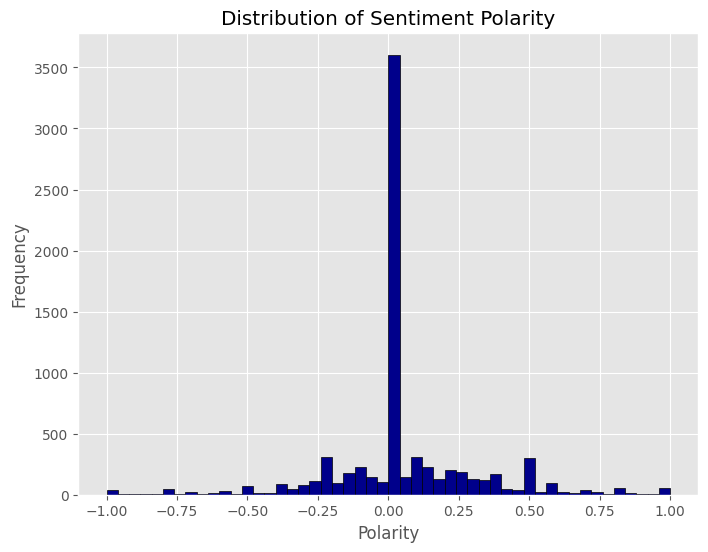

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for sentiment polarity
plt.figure(figsize=(8, 6))
plt.hist(df['polarity'], bins=50, color='darkblue', edgecolor='black')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.grid(True)
plt.show()

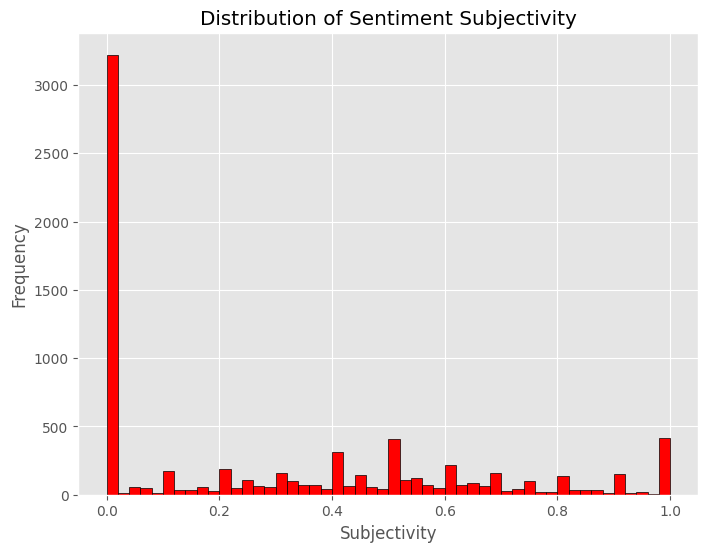

In [ ]:
# Plot histogram for sentiment subjectivity
plt.figure(figsize=(8, 6))
plt.hist(df['subjectivity'], bins=50, color='red', edgecolor='black')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Subjectivity')
plt.grid(True)
plt.show()

#Sentiment Polarity and Sentiment Subjectivity both are maximum at point 0

Integration into Feature Extraction Pipeline

In [ ]:
# Fit and transform text data using TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Perform sentiment analysis using TextBlob
sentiment_scores = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a DataFrame with TF-IDF scores and sentiment analysis results
df_features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_features['sentiment_polarity'] = sentiment_scores

# Display the combined feature matrix with TF-IDF and sentiment analysis features
print("Combined Feature Matrix:\n", df_features)

Combined Feature Matrix:
        00       000  0000  007npen6lg  00cy9vxeff  00end  00pm        01   02  \
0     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
1     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
2     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
3     0.0  0.401049   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
4     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
...   ...       ...   ...         ...         ...    ...   ...       ...  ...   
7608  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7609  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7610  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.296664  0.0   
7611  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7612  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   

 

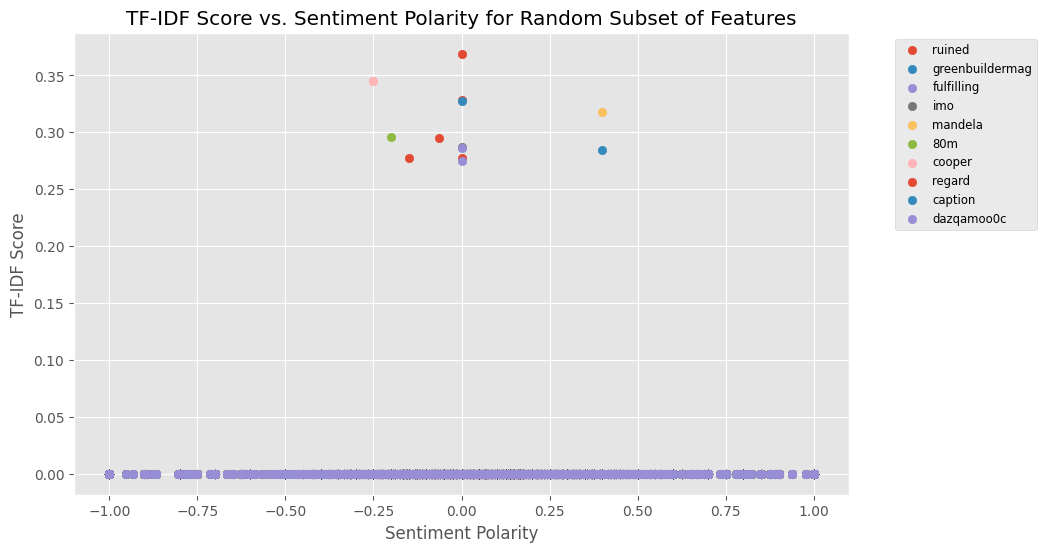

In [ ]:
import random

# Select a random subset of features to plot
num_features_to_plot = 10  # Adjust this as needed
random_features = random.sample(list(df_features.columns[:-1]), num_features_to_plot)

# Plot scatter plot for TF-IDF scores vs. sentiment polarity for each feature
plt.figure(figsize=(10, 6))
for feature in random_features:
    plt.scatter(df_features['sentiment_polarity'], df_features[feature], label=feature)
plt.xlabel('Sentiment Polarity')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Score vs. Sentiment Polarity for Random Subset of Features')
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()

#

# Only 2 or 3 subsets are at points other than 0
● Consider using pre-trained word embeddings like Word2Vec or GloVe to capture semantic meanings.

In [ ]:
import gensim.downloader as api

# Download and load the pre-trained Word2Vec model
w2v_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def get_token_embeddings(tokens, w2v_model):
    embeddings = []
    for token in tokens:
        if token in w2v_model:
            embeddings.append(w2v_model[token])
        else:
            # Handle out-of-vocabulary words (use a zero vector)
            embeddings.append([0] * w2v_model.vector_size)
    return embeddings

In [ ]:
# Applying word embedding to tokenized text
df['embeddings'] = df['tokenized'].apply(lambda x: get_token_embeddings(x, w2v_model))

In [ ]:
# Applying word embedding to tokenized text
df['embeddings'] = df['tokenized'].apply(lambda x: get_token_embeddings(x, w2v_model) if isinstance(x, (list, tuple)) else [])

In [ ]:
# Display DataFrame with tokenized text and corresponding embeddings
print(df[['tokenized', 'embeddings']])

                                              tokenized embeddings
0     ['deeds', 'reason', 'earthquake', 'allah', 'fo...         []
1     ['forest', 'fire', 'near', 'ronge', 'sask', 'c...         []
2     ['residents', 'asked', 'shelter', 'place', 'no...         []
3     ['people', 'receive', 'wildfires', 'evacuation...         []
4     ['just', 'sent', 'photo', 'ruby', 'alaska', 's...         []
...                                                 ...        ...
7608  ['giant', 'cranes', 'holding', 'bridge', 'coll...         []
7609  ['ariaahrary', 'thetawniest', 'control', 'wild...         []
7610                   ['volcano', 'hawaii', 'unknown']         []
7611  ['police', 'investigating', 'ebike', 'collided...         []
7612  ['latest', 'more', 'homes', 'razed', 'northern...         []

[7613 rows x 2 columns]


#● Experiment with additional features like tweet length, presence of hashtags, or user mentions.

In [ ]:
# Calculate tweet length (number of words), handling potential float values
df['tweet_length'] = df['tokenized'].apply(lambda x: len(x) if isinstance(x, (list, tuple)) else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7613 non-null   int64  
 1   location             7613 non-null   object 
 2   text                 7613 non-null   object 
 3   target               7613 non-null   int64  
 4   word count           7613 non-null   int64  
 5   character count      7613 non-null   int64  
 6   average word length  7613 non-null   float64
 7   unique word count    7613 non-null   int64  
 8   stopword count       7613 non-null   int64  
 9   url count            7613 non-null   int64  
 10  mention count        7613 non-null   int64  
 11  hashtag count        7613 non-null   int64  
 12  stopword ratio       7613 non-null   float64
 13  punctuation count    7613 non-null   int64  
 14  text_clean           7612 non-null   object 
 15  tokens               7613 non-null   o

In [ ]:
df['tweet_length'].unique()

array([0])

In [ ]:
df['tweet_length']

,tweet_length
0,0
1,0
2,0
3,0
4,0
...,...
7608,0
7609,0
7610,0
7611,0


In [ ]:
# Check if tweet contains hashtags
df['has_hashtags'] = df['text'].apply(lambda x: 1 if '#' in x else 0)

In [ ]:
df['has_hashtags']

,has_hashtags
0,1
1,0
2,0
3,1
4,1
...,...
7608,0
7609,0
7610,0
7611,0


In [ ]:
# Check if tweet contains user mentions
df['has_user_mentions'] = df['text'].apply(lambda x: 1 if '@' in x else 0)

In [ ]:
df['has_user_mentions']

,has_user_mentions
0,0
1,0
2,0
3,0
4,0
...,...
7608,0
7609,1
7610,0
7611,0


In [ ]:
def combine_features(embeddings, tweet_length, has_hashtags, has_user_mentions):
    # Convert embeddings to numpy array
    embeddings_array = np.array(embeddings)

    # Reshape additional features to match the number of embeddings
    tweet_length_array = np.full((len(embeddings_array), 1), tweet_length)
    has_hashtags_array = np.full((len(embeddings_array), 1), has_hashtags)
    has_user_mentions_array = np.full((len(embeddings_array), 1), has_user_mentions)

    # Concatenate embeddings with additional features along axis 1 (horizontally)
    combined_features = np.concatenate([embeddings_array, tweet_length_array, has_hashtags_array, has_user_mentions_array], axis=1)

    return combined_features

In [ ]:
import numpy as np

def combine_features(embeddings, tweet_length, has_hashtags, has_user_mentions):
    # Convert embeddings to numpy array and ensure it's 2D
    embeddings_array = np.array(embeddings)
    if embeddings_array.ndim == 1:  # Check if it's 1-dimensional
        embeddings_array = embeddings_array.reshape(1, -1)  # Reshape to 2D

    # Reshape additional features to match the number of embeddings
    tweet_length_array = np.full((embeddings_array.shape[0], 1), tweet_length)
    has_hashtags_array = np.full((embeddings_array.shape[0], 1), has_hashtags)
    has_user_mentions_array

In [ ]:
import numpy as np

def combine_features(embeddings, tweet_length, has_hashtags, has_user_mentions):
    # Convert embeddings to numpy array and ensure it's 2D
    embeddings_array = np.array(embeddings)
    if embeddings_array.ndim == 1:  # Check if it's 1-dimensional
        embeddings_array = embeddings_array.reshape(1, -1)  # Reshape to 2D

    # Reshape additional features to match the number of embeddings
    tweet_length_array = np.full((embeddings_array.shape[0], 1), tweet_length)
    has_hashtags_array = np.full((embeddings_array.shape[0], 1), has_hashtags)
    has_user_mentions_array = np.full((embeddings_array.shape[0], 1), has_user_mentions) # Fix: assign the array to has_user_mentions_array

    # Concatenate embeddings with additional features along axis 1 (horizontally)
    combined_features = np.concatenate([embeddings_array, tweet_length_array, has_hashtags_array, has_user_mentions_array], axis=1)

    return combined_features

# Assuming you have the necessary columns 'embeddings', 'tweet_length', 'has_hashtags', 'has_user_mentions' in your DataFrame
# Apply the function to create the 'combined_features' column
df['combined_features'] = df.apply(lambda row: combine_features(row['embeddings'], row['tweet_length'], row['has_hashtags'], row['has_user_mentions']), axis=1)

# Now you can check the structure of the combined_features column
print(df['combined_features'].apply(lambda x: len(x)).value_counts())

combined_features
1    7613
Name: count, dtype: int64


In [ ]:
# Check the structure of combined_features column
print(df['combined_features'].apply(lambda x: len(x)).value_counts())

combined_features
1    7613
Name: count, dtype: int64


# Here we have combined the features like embeddings, tweet length and hashtags and it is showing the total numbers of availability of these things

# 6. Insights from Extracted Features
Word Frequencies and TF-IDF: Identify the most important words contributing to disaster classification. Words with high TF-IDF scores often signify relevance to the topic.
Sentiment Analysis: Helps to assess whether disaster tweets generally exhibit certain sentiments (e.g., negative polarity for disasters).
Word Embeddings: Capture semantic similarity between words (e.g., "flood" and "hurricane" may have similar vector representations).
Additional Features: Tweet length, hashtags, and mentions provide auxiliary signals to enhance the model's ability to classify tweets.

# Logistic Regression

In [ ]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['word count', 'character count', 'average word length', 'unique word count','stopword count', 'url count', 'mention count', 'hashtag count','stopword ratio', 'punctuation count', 'location_numeric','polarity', 'subjectivity', 'tweet_length', 'has_hashtags', 'has_user_mentions']]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train a logistic regression classifier
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

LogisticRegression()

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# ... (your existing code to load and split data) ...

# Create an imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and train the logistic regression classifier
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

# Evaluate the classifier
accuracy = lrn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6638214051214708


In [ ]:
# Evaluate classifier
accuracy = lrn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6638214051214708


In [ ]:
# Get feature names from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get coefficients from the trained logistic regression model
coefficients = lrn.coef_[0]

# Sort feature coefficients
sorted_coefficients_indices = coefficients.argsort()

# Plot top N features with the highest coefficients
top_n = min(20, len(feature_names))  # Ensure top_n does not exceed the number of features available
top_coefficients = coefficients[sorted_coefficients_indices[-top_n:]]
top_feature_names = [feature_names[i] for i in sorted_coefficients_indices[-top_n:]]

In [ ]:
print("top_n:", top_n)
print("len(feature_names):", len(feature_names))
print("len(top_coefficients):", len(top_coefficients))
print("len(top_feature_names):", len(top_feature_names))

top_n: 20
len(feature_names): 21557
len(top_coefficients): 16
len(top_feature_names): 16


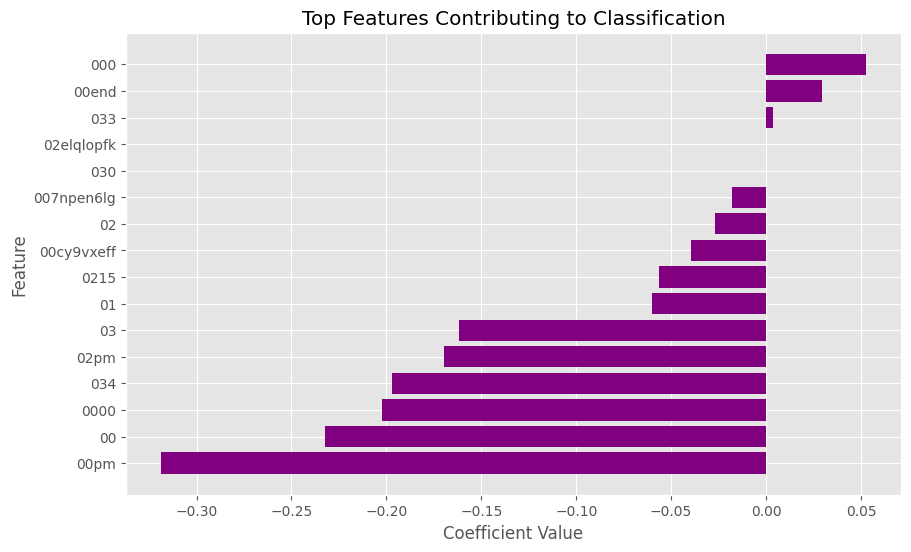

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_coefficients)), top_coefficients,color='purple', align='center')
plt.yticks(range(len(top_coefficients)), top_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Features Contributing to Classification')
plt.grid(True)
plt.show()

#. Insights from the Visualization:
Feature Importance:

The bar chart shows which features (e.g., words, phrases, or other predictors) most influence the classification. Larger coefficient values (positive or negative) indicate stronger contributions.
Positive vs. Negative Contribution:

Positive coefficients (right side of the chart) suggest features that increase the likelihood of a certain classification (e.g., disaster tweets).
Negative coefficients (left side of the chart) suggest features that decrease the likelihood or contribute to the opposite class.
Interpreting the Coefficients:

Features with the highest positive coefficients are strongly associated with one class, while those with the highest negative coefficients are associated with the other class.
This helps identify key words or factors driving the predictions.
Model Explainability:

The chart provides transparency in the model, showing how the predictions are made. This is crucial for understanding and trusting machine learning models in real-world applications.
Actionable Insights:

For tasks like sentiment analysis or disaster tweet classification, identifying top features (e.g., words like "fire" or "help") can guide data cleaning, preprocessing, and further feature engineering.
Optimization:

If certain features dominate the model, it could highlight potential overfitting or suggest where to simplify the model by removing less impactful features.

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate classifier
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6940249507550886


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rfc.feature_importances_

# Sort feature importances
sorted_indices = feature_importances.argsort()

In [ ]:
# Plot top N features with the highest importances
top_n = min(20, len(feature_names))  # Ensure top_n does not exceed the number of features available
top_feature_importances = feature_importances[sorted_indices[-top_n:]]
top_feature_names = [feature_names[i] for i in sorted_indices[-top_n:]]

print("top_n:", top_n)
print("len(top_feature_importances):", len(top_feature_importances))
print("len(top_feature_names):", len(top_feature_names))


top_n: 20
len(top_feature_importances): 16
len(top_feature_names): 16


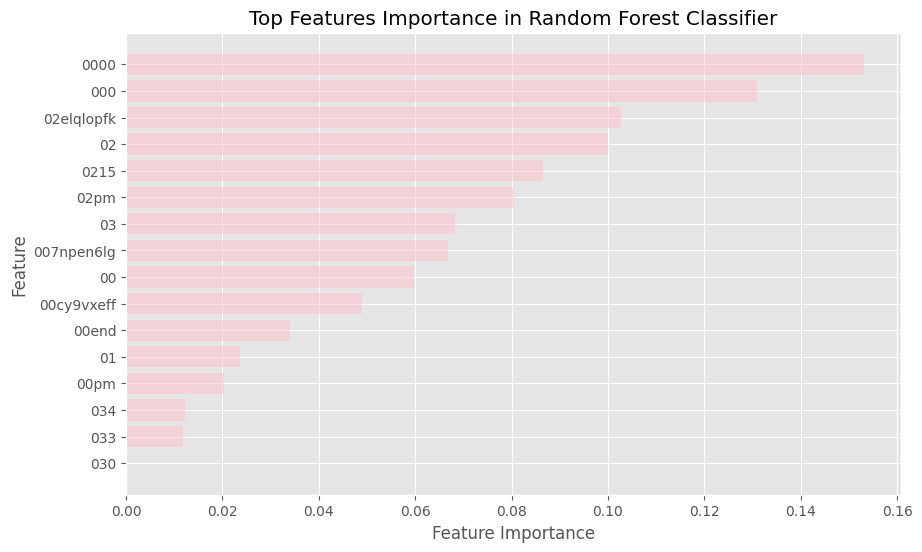

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_importances)), top_feature_importances, align='center', alpha=0.5, color = 'pink')
plt.yticks(range(len(top_feature_importances)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Importance in Random Forest Classifier')
plt.grid(True)
plt.show()

# . Insights from the Visualization
Feature Ranking:

The chart ranks features based on their importance in the Random Forest model. Features higher up in the chart contribute more to the model's predictions.
Importance Distribution:

Features with the highest importance values significantly influence the model's decisions. Lower importance features contribute minimally and could potentially be dropped to simplify the model.
Key Predictors:

The visualization highlights the most impactful predictors for the classification task, such as specific words, phrases, or numerical data points.
Interpreting Feature Importance:

Random Forest calculates feature importance by evaluating how much each feature reduces impurity (e.g., Gini index or entropy) in the trees.
Features with higher importance values have a stronger influence on splitting the data and predicting the target variable.
Optimization Opportunities:

Insights from the chart can guide feature selection. Features with very low importance might be removed to reduce computational complexity without significantly affecting the model's performance.
Model Explainability:

This plot enhances the explainability of the Random Forest model by showing which features drive predictions, which is critical for stakeholder communication and trust in the model.


# Neural Networks

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X = df['text']
y = df['target']

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize text data (convert text into numerical features)
vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Convert sparse matrix to NumPy array
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

In [ ]:
# Define a sequential model
model = Sequential()

In [ ]:
# Add layers to the model
model.add(Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)))  # Input layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model using the train-test split approach
history = model.fit(X_train_vec, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6147 - loss: 0.6384 - val_accuracy: 0.7915 - val_loss: 0.4636
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8120 - loss: 0.4142 - val_accuracy: 0.8013 - val_loss: 0.4485
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8324 - loss: 0.3765 - val_accuracy: 0.7980 - val_loss: 0.4606
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8746 - loss: 0.3035 - val_accuracy: 0.7898 - val_loss: 0.4557
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8847 - loss: 0.2767 - val_accuracy: 0.8030 - val_loss: 0.4891
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9078 - loss: 0.2273 - val_accuracy: 0.7915 - val_loss: 0.5282
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9239 - loss: 0.2004 - val_accuracy: 0.7915 - val_loss: 0.5687
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9386 - loss: 0.1647 - val_accuracy: 0

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_vec, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7820 - loss: 1.3556
Test Loss: 1.247562050819397
Test Accuracy: 0.7866053581237793


# ● Train each model using the training data and evaluate their performance using cross-validation techniques
Defining Text vectorization and Model pipelines

Train and Evaluate models using Cross validation

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Define text vectorization
vectorizer = CountVectorizer(max_features=1000)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Multi-layer Perceptron': MLPClassifier()
}

# Define pipelines with MaxAbsScaler (to scale sparse input without centering)
pipelines = {
    name: make_pipeline(vectorizer, MaxAbsScaler(), model)
    for name, model in models.items()
}


In [ ]:
# Prepare text data
X_text = df['text']
y = df['target']

# Perform cross-validation for each model
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    scores = cross_val_score(pipeline, X_text, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {np.mean(scores):.4f}\n")

Training and evaluating Logistic Regression...
Cross-validation scores: [0.68023638 0.58568615 0.64215364 0.63074901 0.73193167]
Mean accuracy: 0.6542

Training and evaluating Support Vector Machine...
Cross-validation scores: [0.69599475 0.60013132 0.66185161 0.63272011 0.73718791]
Mean accuracy: 0.6656

Training and evaluating Random Forest...
Cross-validation scores: [0.71700591 0.63690085 0.65856861 0.69973719 0.73521682]
Mean accuracy: 0.6895

Training and evaluating Multi-layer Perceptron...
Cross-validation scores: [0.6671044  0.54891661 0.60341431 0.59592641 0.67279895]
Mean accuracy: 0.6176



In [ ]:
# Define hyperparameter grids for each model with correct step names
param_grids = {
    'Logistic Regression': {
        'logisticregression__C': [0.1, 1.0, 10.0]
    },
    'Support Vector Machine': {
        'svc__C': [0.1, 1.0, 10.0],
        'svc__gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [None, 10, 20]
    },
    'Multi-layer Perceptron': {
        'mlpclassifier__hidden_layer_sizes': [(100,), (200,), (300,)]
    }
}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Perform hyperparameter optimization for each model using GridSearchCV
for name, pipeline in pipelines.items():
    param_grid = param_grids[name]

    print(f"Optimizing hyperparameters for {name}...")
    search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    search.fit(X_train, y_train)

    print("Best parameters:", search.best_params_)
    print("Best cross-validation accuracy: {:.4f}".format(search.best_score_))

    # Evaluate the best model on test data
    best_model = search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print("Test accuracy: {:.4f}\n".format(test_accuracy))

Optimizing hyperparameters for Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'logisticregression__C': 1.0}
Best cross-validation accuracy: 0.7915
Test accuracy: 0.7886

Optimizing hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'svc__C': 1.0, 'svc__gamma': 'scale'}
Best cross-validation accuracy: 0.7954
Test accuracy: 0.7912

Optimizing hyperparameters for Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 200}
Best cross-validation accuracy: 0.7744
Test accuracy: 0.7840

Optimizing hyperparameters for Multi-layer Perceptron...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'mlpclassifier__hidden_layer_sizes': (200,)}
Best cross-validation accuracy: 0.7655
Test accuracy: 0.7774



In [ ]:
# Initialize lists to store model names and their corresponding test accuracies
model_names = []
test_accuracies = []

# Perform hyperparameter optimization for each model using GridSearchCV
for name, pipeline in pipelines.items():
    param_grid = param_grids[name]

    print(f"Optimizing hyperparameters for {name}...")
    search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    search.fit(X_train, y_train)

    print("Best parameters:", search.best_params_)
    print("Best cross-validation accuracy: {:.4f}".format(search.best_score_))

    # Evaluate the best model on test data
    best_model = search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print("Test accuracy: {:.4f}\n".format(test_accuracy))

    # Append model name and test accuracy to lists
    model_names.append(name)
    test_accuracies.append(test_accuracy)


Optimizing hyperparameters for Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'logisticregression__C': 1.0}
Best cross-validation accuracy: 0.7915
Test accuracy: 0.7886

Optimizing hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'svc__C': 1.0, 'svc__gamma': 'scale'}
Best cross-validation accuracy: 0.7954
Test accuracy: 0.7912

Optimizing hyperparameters for Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 300}
Best cross-validation accuracy: 0.7765
Test accuracy: 0.7833

Optimizing hyperparameters for Multi-layer Perceptron...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'mlpclassifier__hidden_layer_sizes': (300,)}
Best cross-validation accuracy: 0.7657
Test accuracy: 0.7814



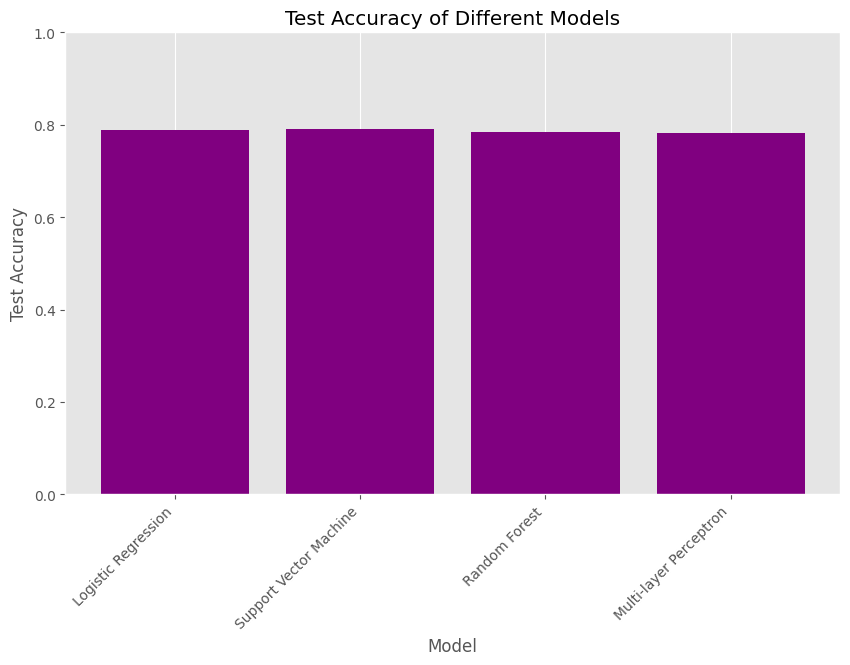

In [ ]:
# Plotting test accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='purple')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# The accuracy of all 4 models are almost same but Logistic Regression is the best model in this dataset
Saving all the models in joblib files

In [ ]:
import joblib

# Save the trained logistic regression model
joblib.dump(lrn, 'logistic_regression_model.joblib')

# Save the trained random forest model
joblib.dump(rfc, 'random_forest_model.joblib')

# Save the trained TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [ ]:
df.to_csv('twitter_disaster_task3.csv')